In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data # Features
y = iris.target # Target (Species)
feature_names = iris.feature_names
target_names = iris.target_names

print("--- Data Loading Complete ---")
print(f"Number of samples: {len(X)}")
print(f"Number of features: {X.shape[1]}")
print(f"Target classes: {target_names}")
print("-" * 30)

# Split the data into training and testing sets (70% train, 30% test)
# This step is often performed before scaling to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Initialize and fit the StandardScaler to the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Normalize (Scale) the features
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display a comparison to show normalization effect (mean close to 0, std close to 1)
print("Mean of Original Training Data (Feature 1):", X_train[:, 0].mean().round(4))
print("Mean of Scaled Training Data (Feature 1):", X_train_scaled[:, 0].mean().round(4))
print("-" * 30)
print("Standard Deviation of Original Training Data (Feature 1):", X_train[:, 0].std().round(4))
print("Standard Deviation of Scaled Training Data (Feature 1):", X_train_scaled[:, 0].std().round(4))

--- Data Loading Complete ---
Number of samples: 150
Number of features: 4
Target classes: ['setosa' 'versicolor' 'virginica']
------------------------------
Mean of Original Training Data (Feature 1): 5.8733
Mean of Scaled Training Data (Feature 1): 0.0
------------------------------
Standard Deviation of Original Training Data (Feature 1): 0.8588
Standard Deviation of Scaled Training Data (Feature 1): 1.0


In [2]:
from sklearn.neighbors import KNeighborsClassifier

# Set the initial value for K (number of neighbors)
K = 5 

# Initialize the KNN Classifier
# We set n_neighbors=K and p=2 (Euclidean distance, the default)
knn_classifier = KNeighborsClassifier(n_neighbors=K)

# Train the model using the normalized training data
# X_train_scaled was created in Task 1
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the normalized test data
# These predictions will be used in the following evaluation tasks
y_pred = knn_classifier.predict(X_test_scaled)

print(f"--- KNN Model Training Complete (with K={K}) ---")
print("Model is trained and predictions (y_pred) on the test set are ready.")

--- KNN Model Training Complete (with K=5) ---
Model is trained and predictions (y_pred) on the test set are ready.


--- Experimentation with K Complete ---
Optimal K (highest accuracy): 9 with Accuracy: 0.9556
----------------------------------------


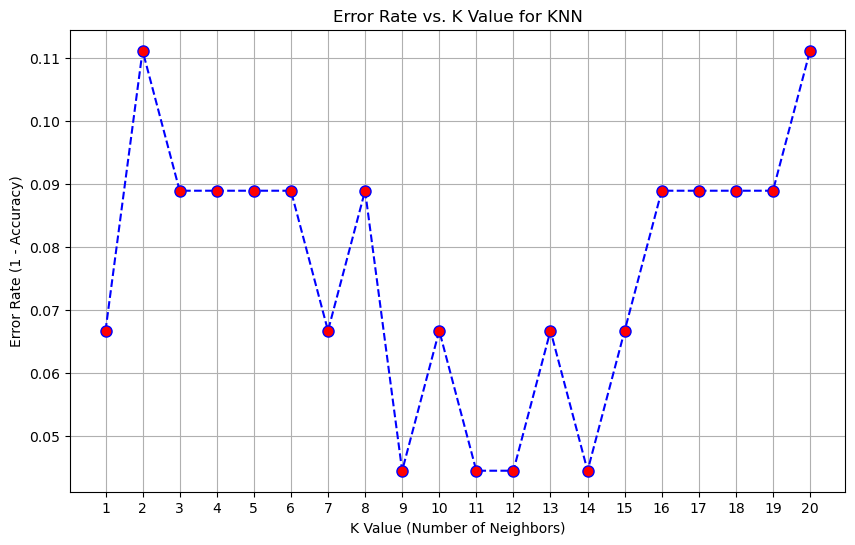

In [3]:
from sklearn.metrics import accuracy_score

# List to hold the accuracy for each K
accuracy_list = []
# List to hold the mean error rate (1 - accuracy) for each K
error_rate = []

# Choose a range of K values to test (e.g., K=1 to K=20)
k_values = range(1, 21)

for k in k_values:
    # Initialize KNN with the current K
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model (using the scaled training data from Task 1)
    knn.fit(X_train_scaled, y_train)
    
    # Predict on the scaled test data
    y_pred_k = knn.predict(X_test_scaled)
    
    # Calculate accuracy and error rate
    acc = accuracy_score(y_test, y_pred_k)
    accuracy_list.append(acc)
    error_rate.append(1 - acc)

# Find the best K value
best_k = k_values[np.argmax(accuracy_list)]
best_accuracy = np.max(accuracy_list)

print(f"--- Experimentation with K Complete ---")
print(f"Optimal K (highest accuracy): {best_k} with Accuracy: {best_accuracy:.4f}")
print("-" * 40)

# Visualize the Error Rate vs. K Value
plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rate, color='blue', linestyle='dashed', 
         marker='o', markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value for KNN')
plt.xlabel('K Value (Number of Neighbors)')
plt.ylabel('Error Rate (1 - Accuracy)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Update the variable with the best K for subsequent tasks
K_best = best_k

--- Model Evaluation (Using Optimal K=9) ---
Overall Model Accuracy: 0.9556

Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



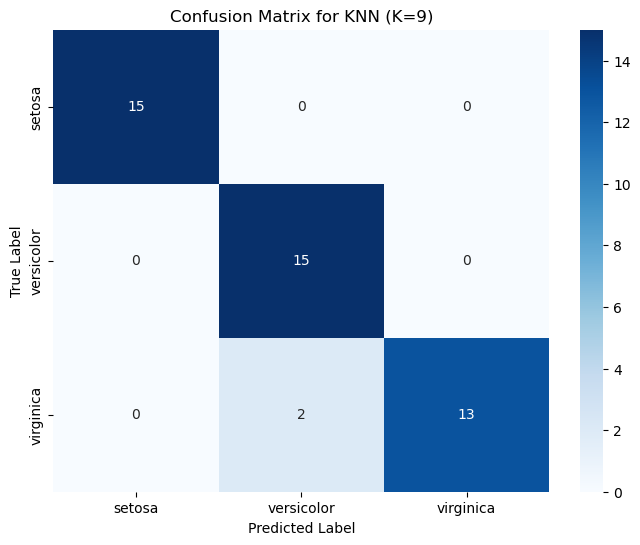

In [4]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Retrain the final model using the Optimal K
final_knn_model = KNeighborsClassifier(n_neighbors=K_best)
final_knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_final = final_knn_model.predict(X_test_scaled)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred_final)
print(f"--- Model Evaluation (Using Optimal K={K_best}) ---")
print(f"Overall Model Accuracy: {accuracy:.4f}\n")

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_final)
print("Confusion Matrix:")
print(conf_matrix)

# Generate Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
target_names = iris.target_names # Get the species names
print(classification_report(y_test, y_pred_final, target_names=target_names))

# Visualize the Confusion Matrix 
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix, 
    annot=True, 
    fmt='d', 
    cmap='Blues',
    xticklabels=target_names, 
    yticklabels=target_names
)
plt.title(f'Confusion Matrix for KNN (K={K_best})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

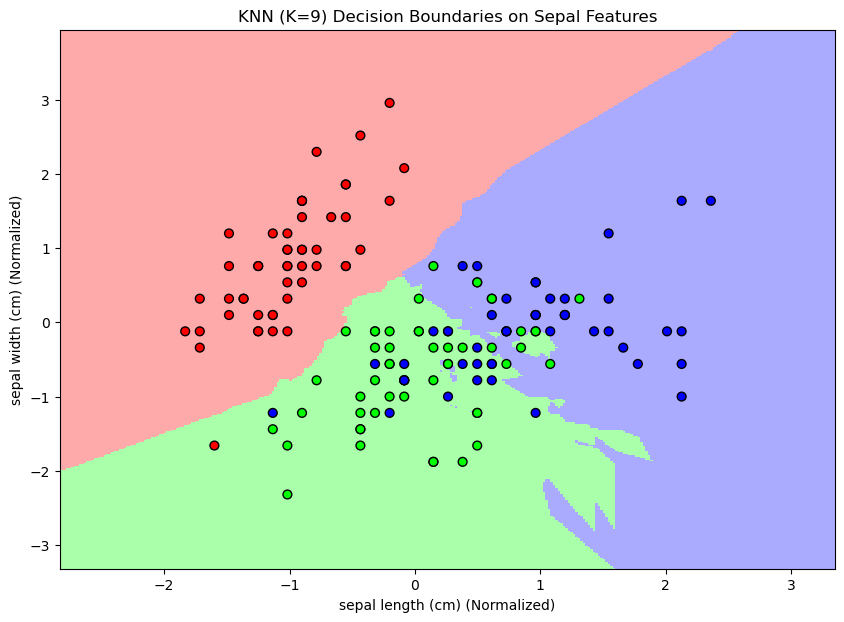


--- Decision Boundary Visualization Complete ---
The plot shows the classification regions for the first two features (Sepal Length and Sepal Width).


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# Select only the first two features (Sepal Length and Sepal Width)
X_2D = X[:, :2] # X is the original unscaled data from Task 1
y_2D = y        # Target remains the same

# Split and Scale the 2D data
X_train_2D, X_test_2D, y_train_2D, y_test_2D = train_test_split(
    X_2D, y_2D, test_size=0.3, random_state=42, stratify=y_2D
)

scaler_2D = StandardScaler()
X_train_2D_scaled = scaler_2D.fit_transform(X_train_2D)
X_combined_2D_scaled = np.vstack((X_train_2D_scaled, scaler_2D.transform(X_test_2D)))
y_combined_2D = np.hstack((y_train_2D, y_test_2D))

# Train the KNN model using the Optimal K (K_best) on the 2D data
classifier_2D = KNeighborsClassifier(n_neighbors=K_best)
classifier_2D.fit(X_train_2D_scaled, y_train_2D)

# Define the plot region and create the decision boundary mesh
x_min, x_max = X_combined_2D_scaled[:, 0].min() - 1, X_combined_2D_scaled[:, 0].max() + 1
y_min, y_max = X_combined_2D_scaled[:, 1].min() - 1, X_combined_2D_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the class for every point in the mesh (the decision surface)
Z = classifier_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(figsize=(10, 7))

# Plot the decision surface
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Plot the training points
plt.scatter(X_combined_2D_scaled[:, 0], X_combined_2D_scaled[:, 1], 
            c=y_combined_2D, cmap=cmap_bold, edgecolor='k', s=40)

# Labels and Title
feature_names = iris.feature_names[:2] # Get names of the two features
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"KNN (K={K_best}) Decision Boundaries on Sepal Features")
plt.xlabel(f"{feature_names[0]} (Normalized)")
plt.ylabel(f"{feature_names[1]} (Normalized)")
plt.show()

print("\n--- Decision Boundary Visualization Complete ---")
print("The plot shows the classification regions for the first two features (Sepal Length and Sepal Width).")